p: The lag order, representing the number of lag observations incorporated in the model.
d: Degree of differencing, denoting the number of times raw observations undergo differencing.
q: Order of moving average, indicating the size of the moving average window.

In [2]:
# fit an ARIMA model and plot residual errors
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('../DATA/data.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Min Temp

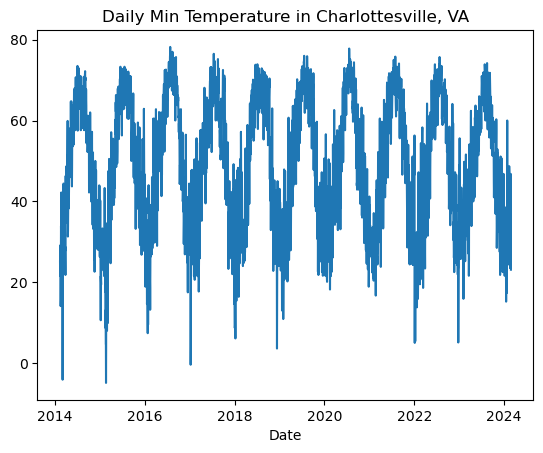

In [7]:
# Plot the time series
plt.plot(data['min_temp'])
plt.title('Daily Min Temperature in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

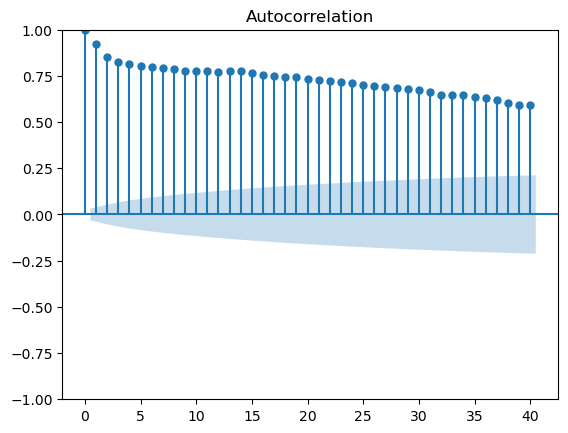

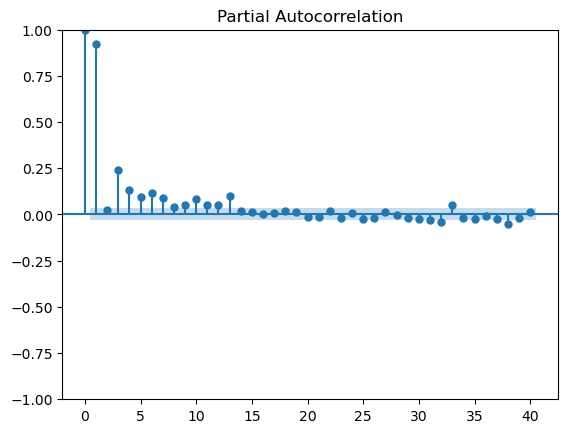

In [8]:
# finding parameters
plot_acf(data['min_temp'], lags=40)
plot_pacf(data['min_temp'], lags=40)
plt.show()

In [9]:
# building the ARIMA model
model = ARIMA(data['min_temp'], order=(3, 1, 0))
model_fit = model.fit()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [10]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


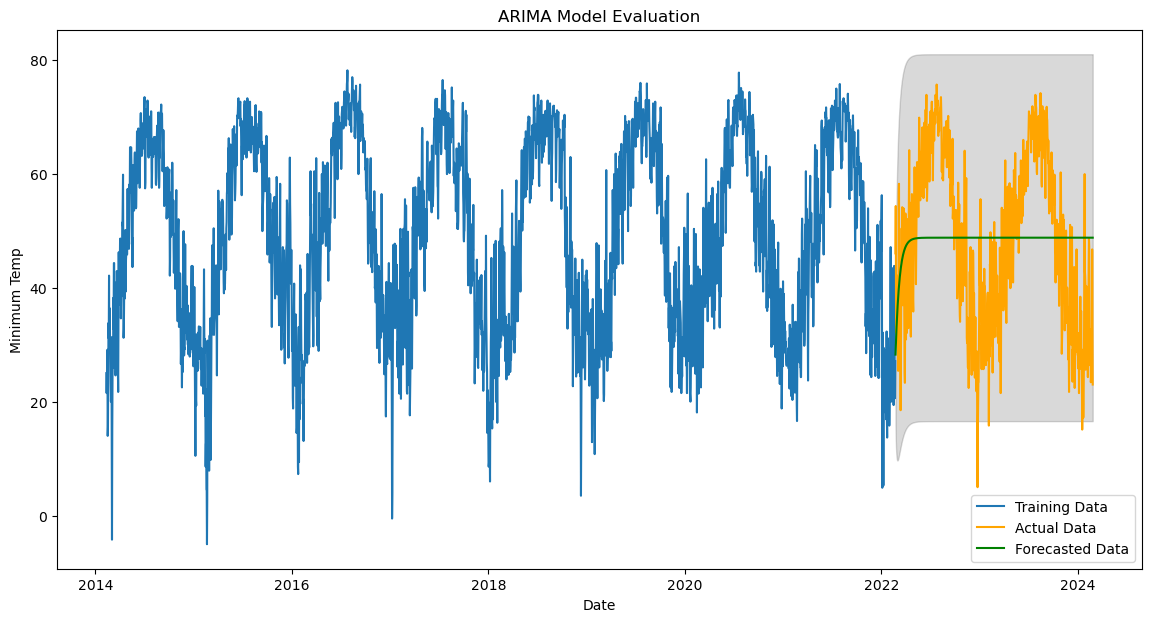

RMSE: 14.78750759182715


In [36]:
# model evaluation
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['min_temp'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['min_temp'], test_forecast_series)
min_temp_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['min_temp'], label='Training Data')
plt.plot(test['min_temp'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Minimum Temp')
plt.legend()
plt.show()

print('RMSE:', min_temp_rmse)

# Mean Temp

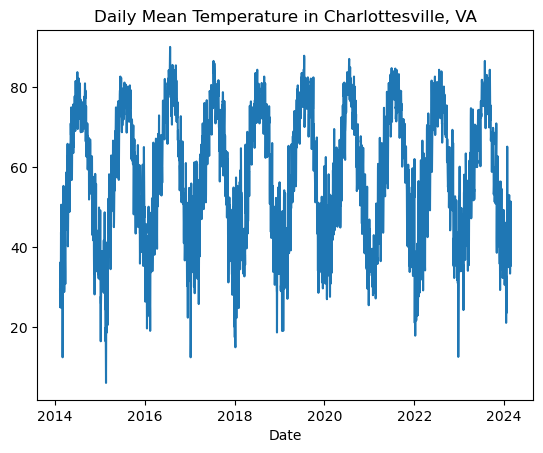

In [12]:
# Plot the time series
plt.plot(data['mean_temp'])
plt.title('Daily Mean Temperature in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

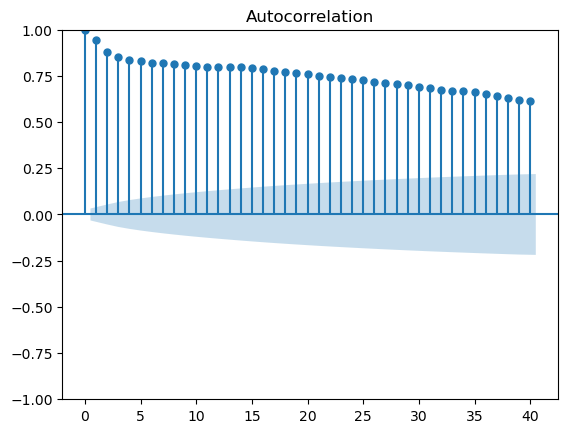

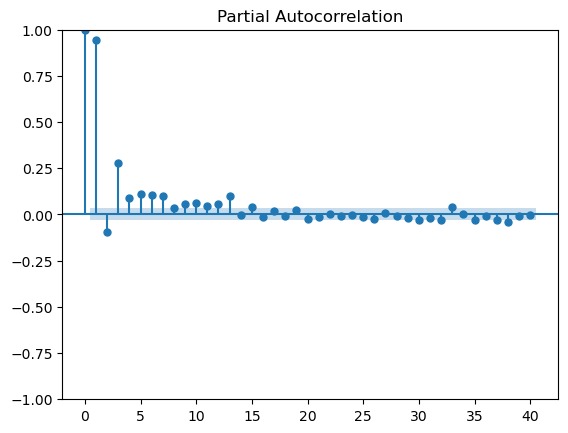

In [13]:
# finding parameters

plot_acf(data['mean_temp'], lags=40)
plot_pacf(data['mean_temp'], lags=40)
plt.show()

In [14]:
# building the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['mean_temp'], order=(3, 1, 0))
model_fit = model.fit()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [15]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


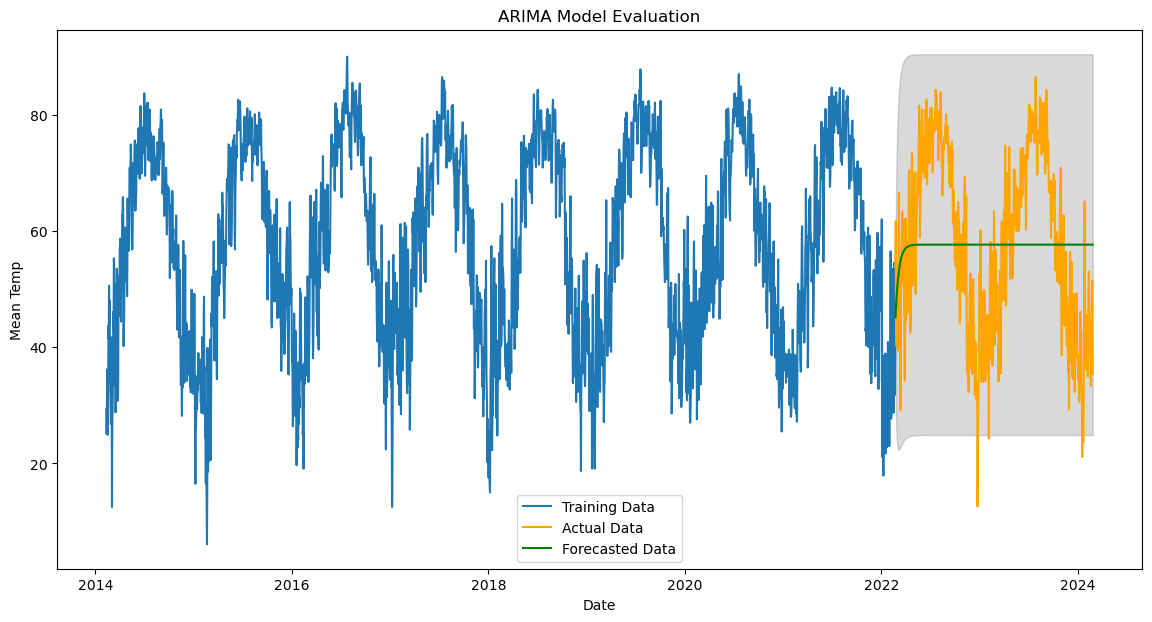

RMSE: 15.302368959907685


In [34]:
# model evaluation
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['mean_temp'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['mean_temp'], test_forecast_series)
mean_temp_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['mean_temp'], label='Training Data')
plt.plot(test['mean_temp'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Mean Temp')
plt.legend()
plt.show()

print('RMSE:', mean_temp_rmse)

# Max Temp

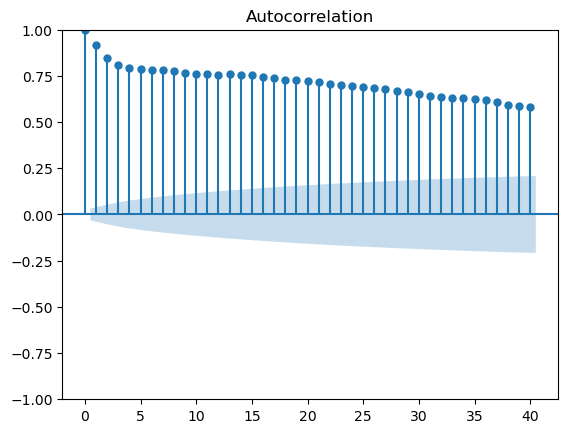

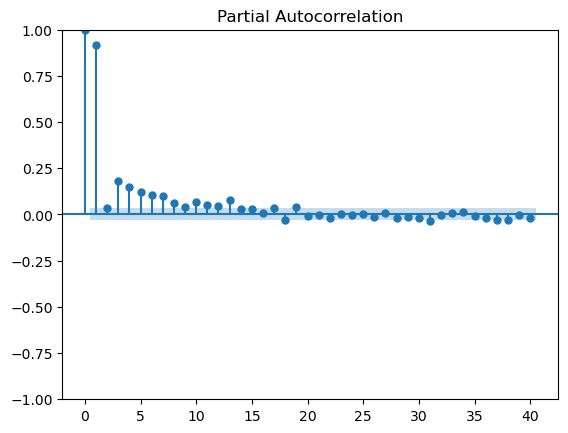

In [32]:
plot_acf(data['max_temp'], lags=40)
plot_pacf(data['max_temp'], lags=40)
plt.show()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packag

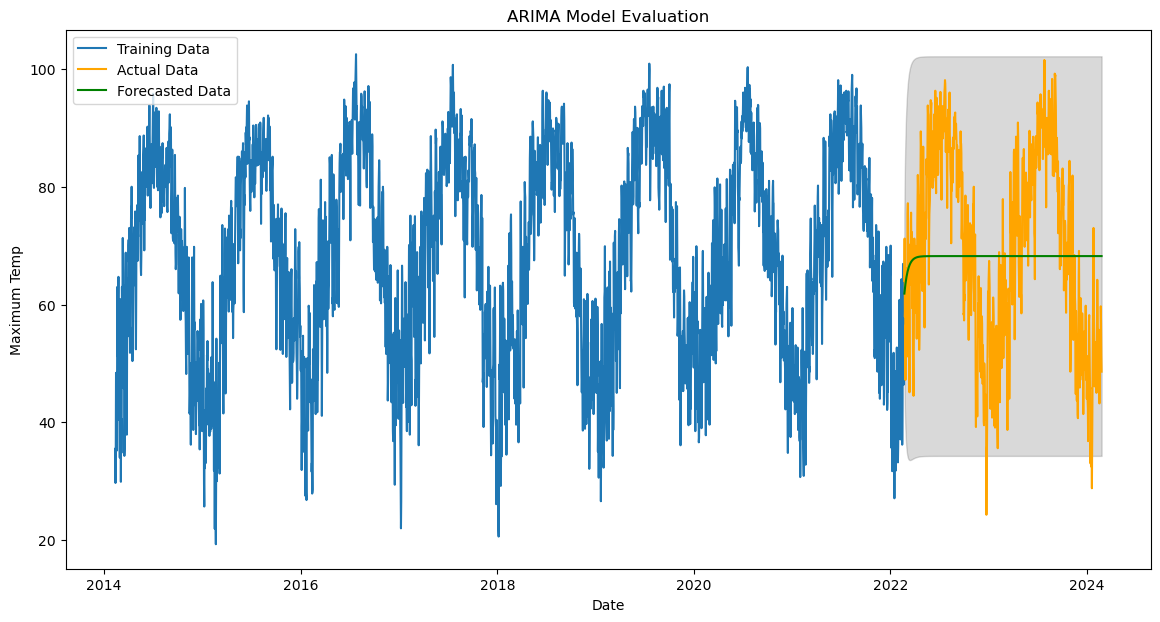

RMSE: 24.410115793465717


In [35]:
# building the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['max_temp'], order=(3, 1, 0))
model_fit = model.fit()

# training and forecast
forecast = model_fit.get_forecast(steps=30)

# model evaluation
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['max_temp'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['min_temp'], test_forecast_series)
max_temp_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['max_temp'], label='Training Data')
plt.plot(test['max_temp'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Maximum Temp')
plt.legend()
plt.show()

print('RMSE:', max_temp_rmse)

# Sunrise

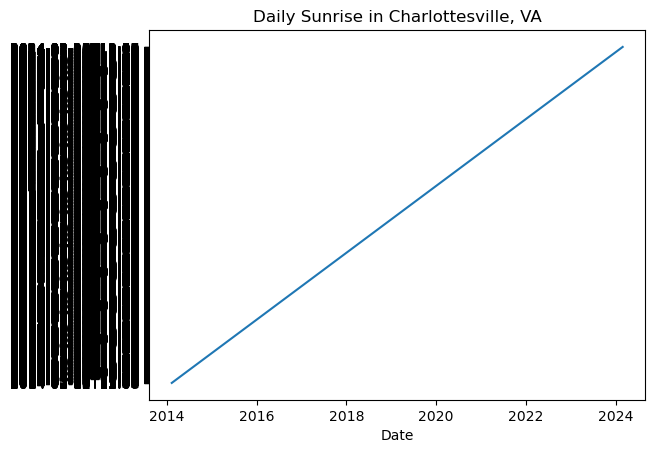

In [17]:
# Plot the time series
plt.plot(data['sunrise'])
plt.title('Daily Sunrise in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

ValueError: could not convert string to float: '2014-02-11T12:08'

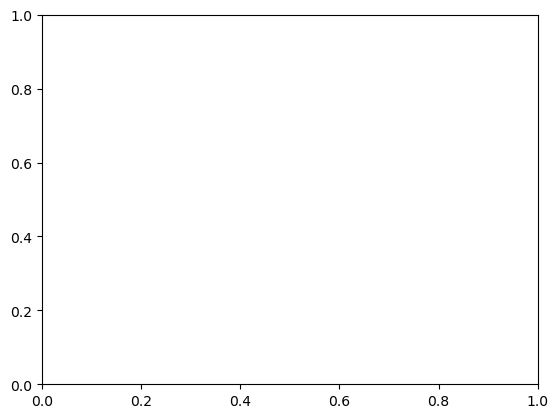

In [18]:
# finding parameters
plot_acf(data['sunrise'], lags=40)
plot_pacf(data['sunrise'], lags=40)
plt.show()

In [19]:
# building the ARIMA model
model = ARIMA(data['sunrise'], order=(1,0,1))
model_fit = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [20]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


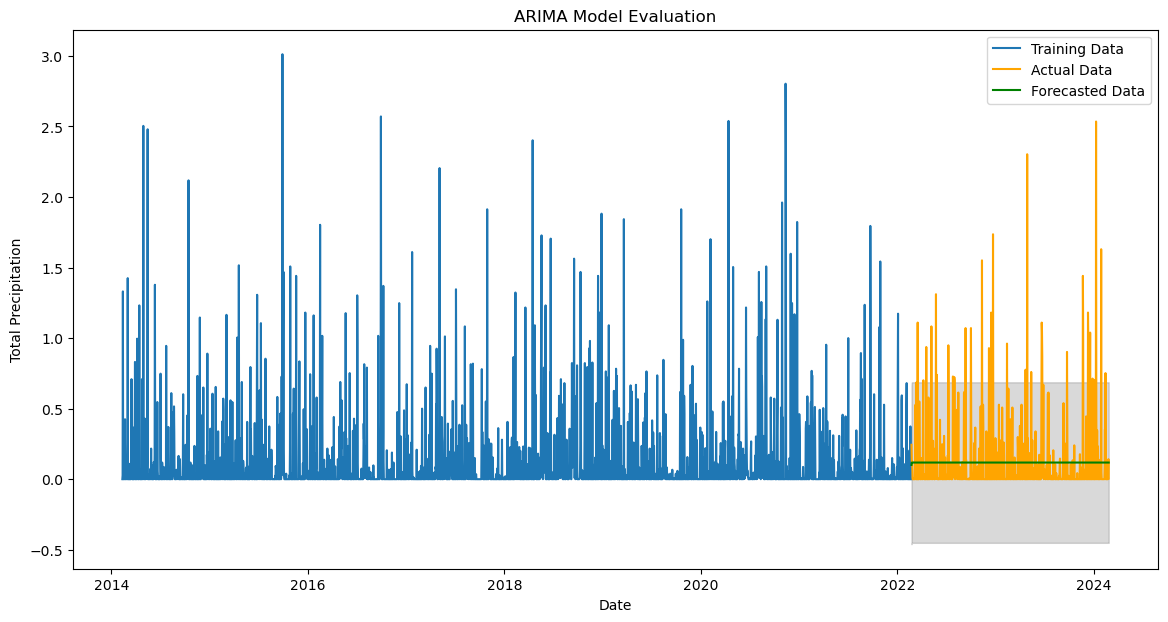

RMSE: 0.26748214073349225


In [37]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['total_precip'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['total_precip'], test_forecast_series)
sunrise_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['total_precip'], label='Training Data')
plt.plot(test['total_precip'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation')
plt.legend()
plt.show()

print('RMSE:', sunrise_rmse)

# Total Precipitation

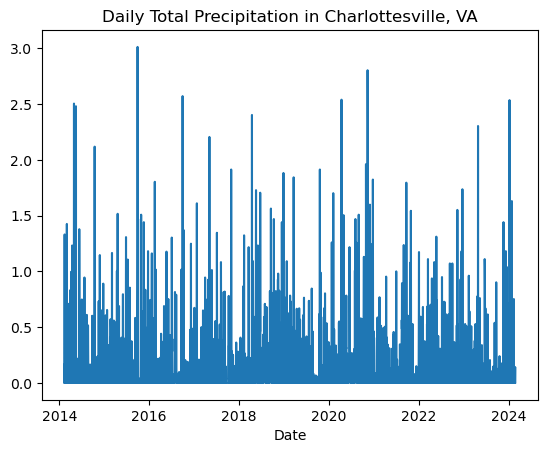

In [22]:
# Plot the time series
plt.plot(data['total_precip'])
plt.title('Daily Total Precipitation in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

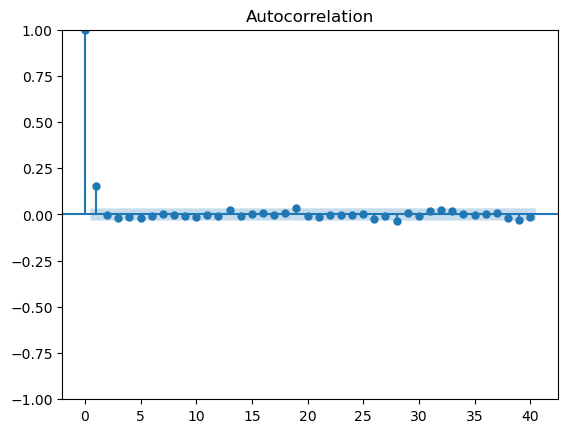

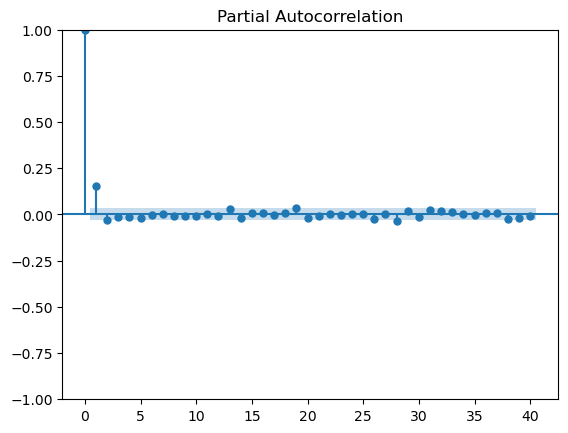

In [23]:
# finding parameters
plot_acf(data['total_precip'], lags=40)
plot_pacf(data['total_precip'], lags=40)
plt.show()

In [24]:
# building the ARIMA model
model = ARIMA(data['total_precip'], order=(2,1,0))
model_fit = model.fit()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [25]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


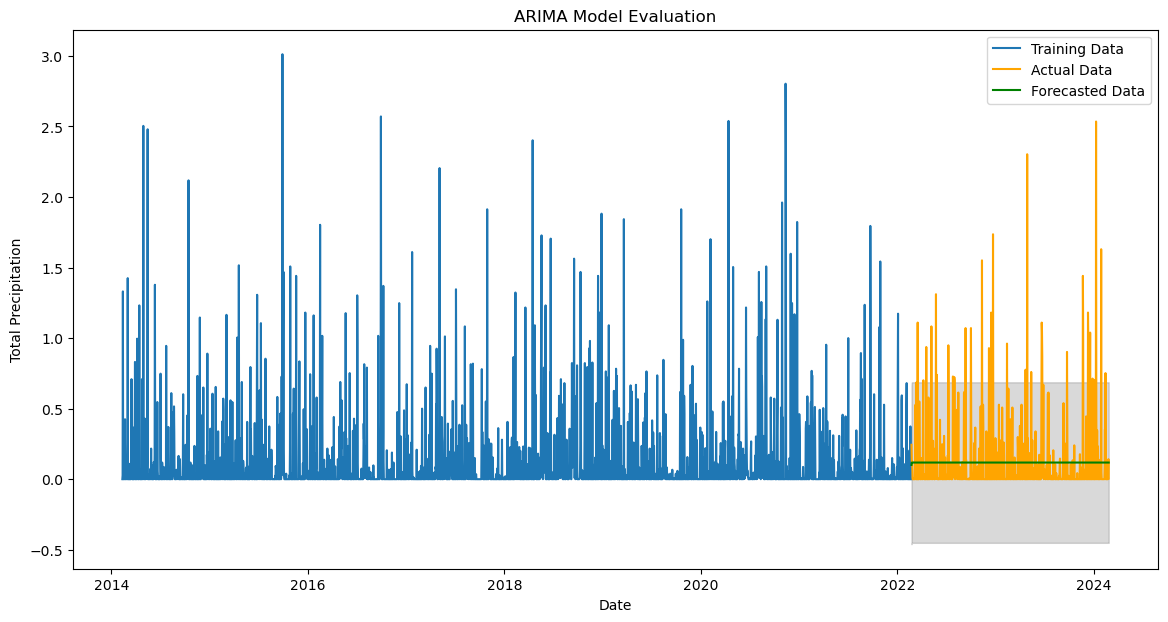

RMSE: 0.26748214073349225


In [38]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['total_precip'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['total_precip'], test_forecast_series)
total_precip_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['total_precip'], label='Training Data')
plt.plot(test['total_precip'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation')
plt.legend()
plt.show()

print('RMSE:', total_precip_rmse)

# Snow

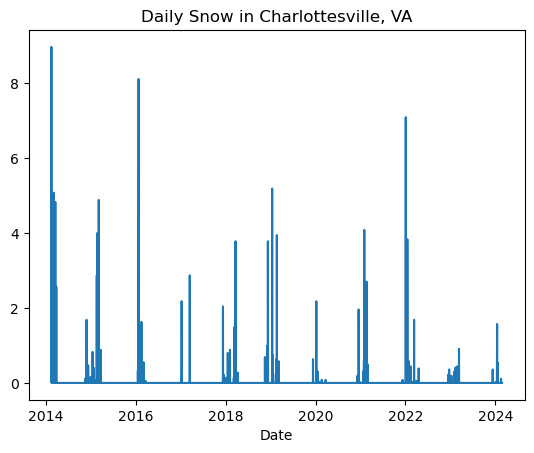

In [27]:
# Plot the time series
plt.plot(data['snow'])
plt.title('Daily Snow in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

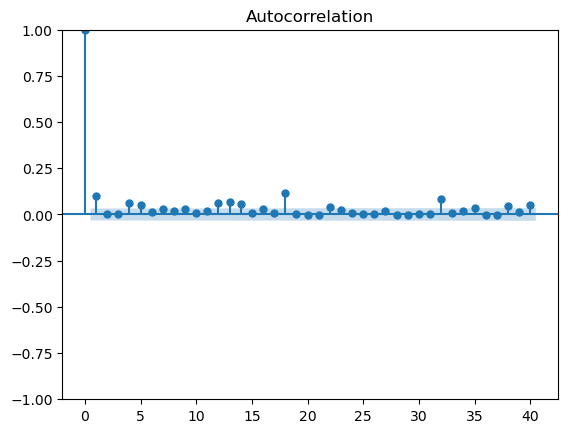

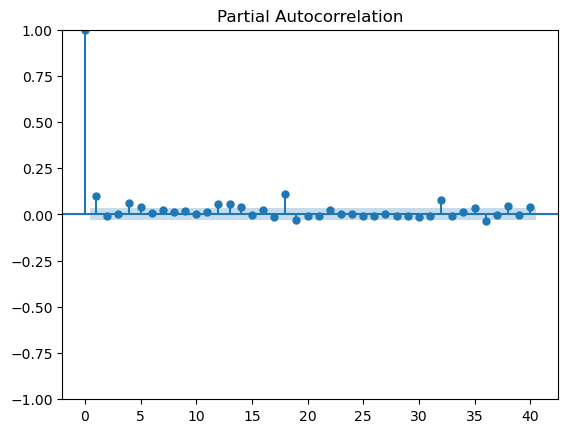

In [28]:
# finding parameters
plot_acf(data['snow'], lags=40)
plot_pacf(data['snow'], lags=40)
plt.show()

In [29]:
# building the ARIMA model
model = ARIMA(data['snow'], order=(1,1,0))
model_fit = model.fit()

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [30]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/sarahwimbish/miniconda3/envs/ds4003/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


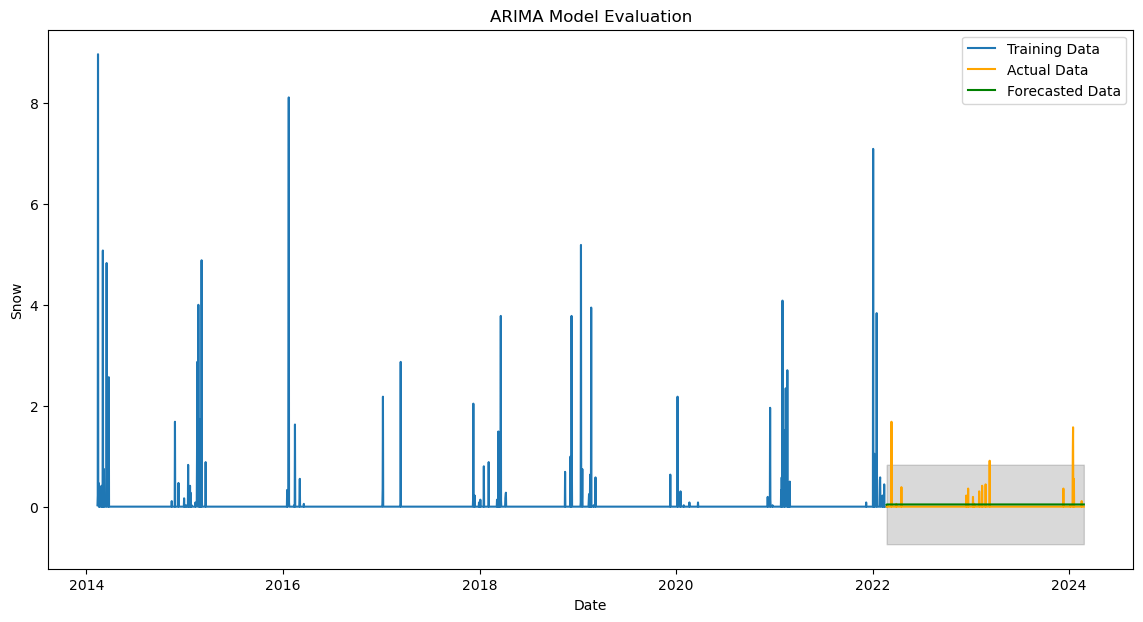

RMSE: 0.11180951869449043


In [39]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['snow'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['snow'], test_forecast_series)
snow_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['snow'], label='Training Data')
plt.plot(test['snow'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Snow')
plt.legend()
plt.show()

print('RMSE:', snow_rmse)

# Hours of Precipitation

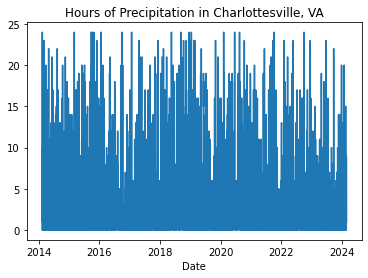

In [15]:
# Plot the time series
plt.plot(data['precip_hours'])
plt.title('Hours of Precipitation in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

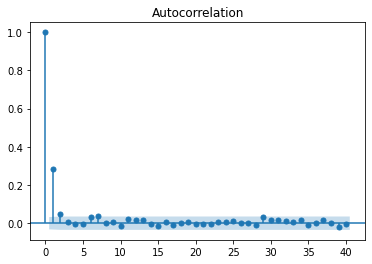

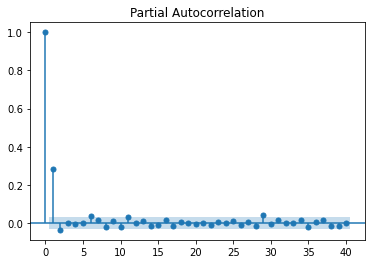

In [16]:
# finding parameters
plot_acf(data['precip_hours'], lags=40)
plot_pacf(data['precip_hours'], lags=40)
plt.show()

In [18]:
# building the ARIMA model
model = ARIMA(data['precip_hours'], order=(1,1,0))
model_fit = model.fit()

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [19]:
# training and forecast
forecast = model_fit.get_forecast(steps=30)

/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/channingpitts/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


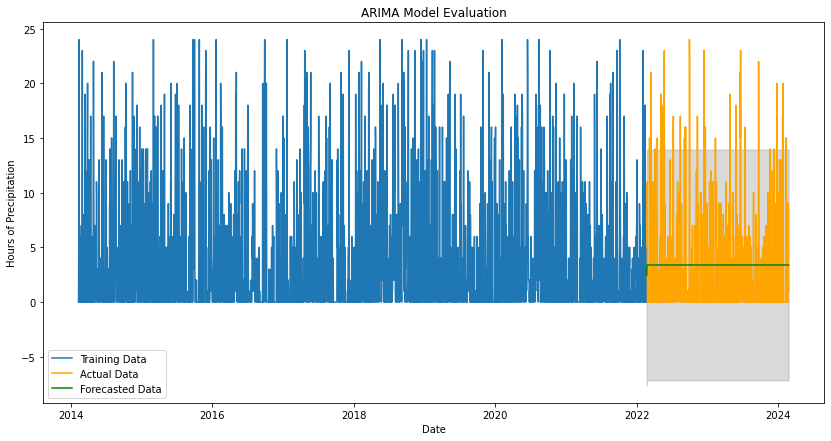

RMSE: 4.582115886780125


In [21]:
# model evaluation

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['precip_hours'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['precip_hours'], test_forecast_series)
precip_hours_rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['precip_hours'], label='Training Data')
plt.plot(test['precip_hours'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Hours of Precipitation')
plt.legend()
plt.show()

print('RMSE:', precip_hours_rmse)